Shape of dataset: (11370, 5)

Null values:
 id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

Class distribution:
 target
0    9256
1    2114
Name: count, dtype: int64


C:\Users\kamba\AppData\Local\Temp\ipykernel_20032\2604203168.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette="Set2")


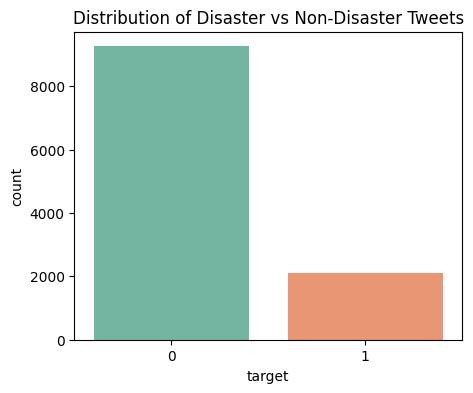

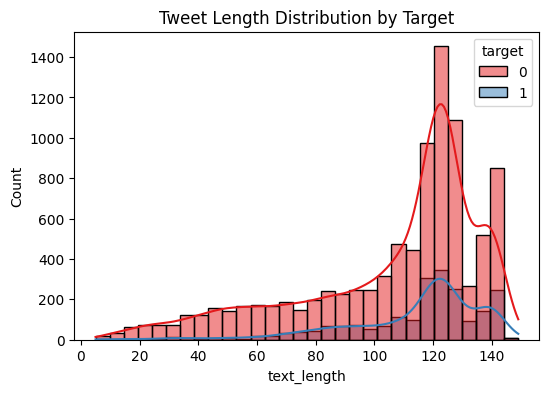


Top 15 Important Features:

           feature  chi2_score       p_value
4037      sinkhole   80.377184  3.093465e-19
705            bus   70.897875  3.762029e-17
4498  thunderstorm   68.003170  1.632329e-16
2465        killed   64.649371  8.948486e-16
4352      swallows   64.325386  1.054779e-15
948      collision   55.454192  9.566249e-14
4567         train   53.906528  2.102579e-13
1865       freight   52.003403  5.540455e-13
4810       warning   51.859240  5.962540e-13
3957        severe   50.478913  1.204521e-12
2151       hitchin   45.409027  1.598957e-11
863          china   43.567576  4.095692e-11
4770       volcano   43.271395  4.764989e-11
2994            nc   37.487045  9.202216e-10
1279    derailment   37.141053  1.098858e-09


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

df = pd.read_csv(r"C:\Users\kamba\Downloads\tweets.csv\tweets.csv")

print("Shape of dataset:", df.shape)
print("\nNull values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['target'].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df, palette="Set2")
plt.title("Distribution of Disaster vs Non-Disaster Tweets")
plt.show()

df['text_length'] = df['text'].astype(str).apply(len)
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='text_length', hue='target', bins=30, kde=True, palette="Set1")
plt.title("Tweet Length Distribution by Target")
plt.show()

df['keyword'] = df['keyword'].fillna("unknown")
df['location'] = df['location'].fillna("unknown")

df['clean_text'] = df['text'].astype(str).str.lower()

vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X = vectorizer.fit_transform(df['clean_text'])
y = df['target']

chi2_scores, p_values = chi2(X, y)
feature_scores = pd.DataFrame({
    "feature": vectorizer.get_feature_names_out(),
    "chi2_score": chi2_scores,
    "p_value": p_values
}).sort_values(by="chi2_score", ascending=False)

print("\nTop 15 Important Features:\n")
print(feature_scores.head(15))
